In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
data = pd.read_csv("stock_data.csv",index_col = 'Date')
data.rename(columns = {"Adj Close" : "adj_close"}, inplace = True)

In [278]:
def MACD(data, fast, slow, signal):    
    data2 = data["adj_close"].copy()
    data2 = data2.to_frame()
    data2["ma_fast"] = data2["adj_close"].ewm(span=fast,min_periods=fast).mean()
    data2["ma_slow"] = data2["adj_close"].ewm(span=slow,min_periods=slow).mean()
    data2["macd"] = data2["ma_fast"] - data2["ma_slow"]
    data2["signal"] = data2["macd"].ewm(span=signal,min_periods=signal).mean()
    data2 = data2.dropna(axis=0, how='any')
    return data2

Text(0.5, 1.0, 'STOCK_COLORCODED')

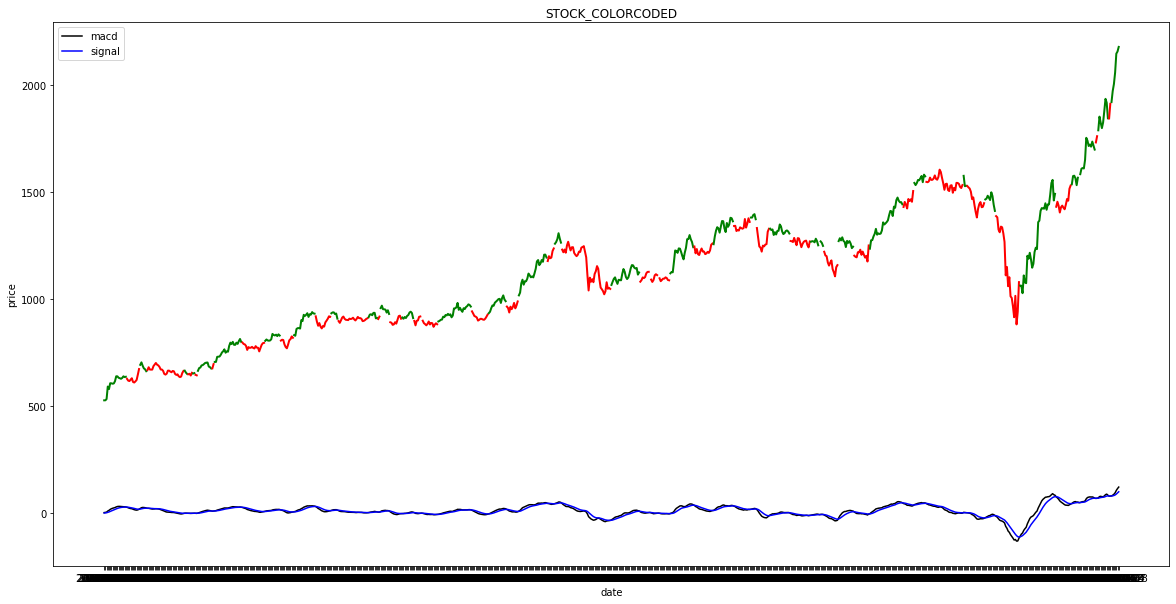

In [284]:
MACD(data, 12,26,9)

#creating labels for coloring
data2['label'] = np.where(data2['macd'] > data2['signal'], 1, -1)

#creating group to plot stock price
def plot_func(group):
        global ax
        color = 'r' if (group['label'] < 0).all() else 'g'
        lw = 2.0
        ax.plot(group.index, group.adj_close, c=color, linewidth=lw)
group = data2.groupby((data2['label'].shift() * data2['label'] < 0).cumsum())


#creating chart
fig, ax = plt.subplots(figsize=(20,10))
group.apply(plot_func)

#ploting macd and signal line
ax.plot(data2.index, data2['macd'], 'k', label='macd' )
ax.plot(data2.index, data2['signal'], 'b', label='signal')
ax.legend()
plt.xlabel('date')
plt.ylabel('price')
plt.title('STOCK_COLORCODED')